# Netflix Data Analysis

### From Kaggle:

* This dataset was last updated 4/9/2024

> The Netflix Titles dataset is a comprehensive compilation of movies and TV shows available on Netflix, covering various aspects such as the title type, director, cast, country of production, release year, rating, duration, genres (listed in), and a brief description. This dataset is instrumental for analyzing trends in Netflix content, understanding genre popularity, and examining the distribution of content across different regions and time periods.



# Goals:

1. **Content Distribution:**

*   How many movies vs. TV shows are available on Netflix?
*   Which countries produce the most content available on Netflix?
*   How has the distribution of content (movies vs. TV shows) changed over time?
  
2. **Genre Analysis:**

*   What are the most popular genres on Netflix?
*   How has genre popularity evolved over the years?
*   Are there any correlations between the country of production and the genres produced?

3. **Rating Analysis:**

*   What are the most common age ratings for Netflix content?
*   Is there a relationship between content type (movie/TV show) and age rating?

4. **Duration Analysis:**

*   What is the average number of seasons for TV shows?
*   Are there trends in content duration over time?

5. **Director and Cast Analysis:**

*   Who are the most prolific directors on Netflix?
*   Which actors/actresses appear most frequently in Netflix content?
*   Is there a correlation between the presence of certain directors or actors/actresses and the popularity or ratings of a title?

6. **Market and Geographic Analysis:**

*   Are there regional preferences in genre, rating, or content type?

7. **Content Description Analysis:**

*   Can natural language processing (NLP) techniques identify common themes or keywords in content descriptions?
*   Are there specific words or phrases that correlate with higher ratings or popularity?

8. **Recommendation Systems:**

*   Build a simple recommendation system based on metadata such as genre, cast, director, and description, to suggest titles similar to a given movie or TV show?
*   How effective are genre-based recommendations compared to more complex content-based recommendations?


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports And Project Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import re

from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

# replace with your file path if you want to run this on your machine
file_path = "/content/drive/MyDrive/Colab_Notebooks/ML_Portfolio/Netflix_Data_Analysis/netflix_titles.csv"

if not os.path.exists(file_path):
    print(f"ERROR: '{file_path}' does not exist")
else:
    try:
        dataset = pd.read_csv(file_path, encoding='ISO-8859-1')
        print("Dataset before preprocessing: \n")
        print(dataset.head())
        print(f"Shape: {dataset.shape}\n")
        print(dataset.info())
    except UnicodeDecodeError:
        print(f"Error decoding file: '{file_path}'. Try using a different encoding.")

Dataset before preprocessing: 

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 202

# Pre-Processing The Data

As seen above, there are lots of null columns added into the dataset, let's remove those.

We also see that some columns have rows that have not been filled out. To preserve the shape of the dataset we will populate those cells with "Unkown" values since the missing entries are mostly located in the 'Director', 'Cast', and 'Country' columns.

Finally we will convert the **'date_added'** column to datetime format and populate any empty cells with placeholder values for a cleaner analysis

In [3]:
# Drop unnamed columns
dataset.drop(dataset.columns[dataset.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)
# Fill missing values with Unknown
dataset.fillna(value="Unknown", inplace=True)
# change the datatype of 'date_added' to date_time format
dataset['date_added'] = pd.to_datetime(dataset['date_added'], errors='coerce')
# Check if there are any missing values in 'date_added' column
missing_date_added = dataset['date_added'].isnull().sum()

# If there are missing values, add placeholder dates to match the number of entries
if missing_date_added > 0:
    max_date = dataset['date_added'].max()
    placeholder_dates = pd.date_range(start=max_date + pd.Timedelta(days=1), periods=missing_date_added)
    dataset.loc[dataset['date_added'].isnull(), 'date_added'] = placeholder_dates

print("Dataset after preprocessing: \n")
print(dataset.head())
print(f"Shape: {dataset.shape}\n")
print(dataset.info())


Dataset after preprocessing: 

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          202

# Analysis

# **Content Distribution:**

*   ## How many movies vs. TV shows are available on Netflix?
*   ## Which countries produce the most content available on Netflix?
*   ## How has the distribution of content (Movies vs. TV shows) changed over time?

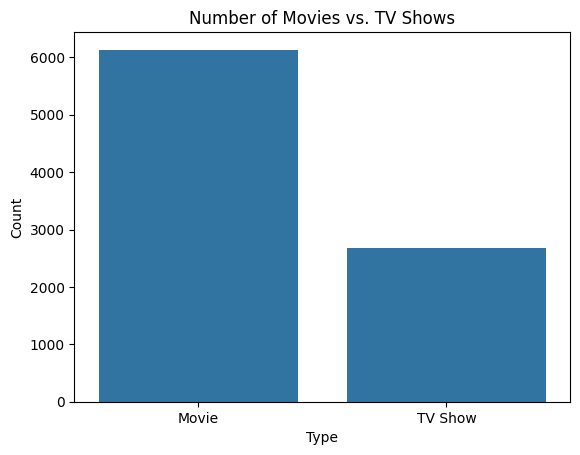

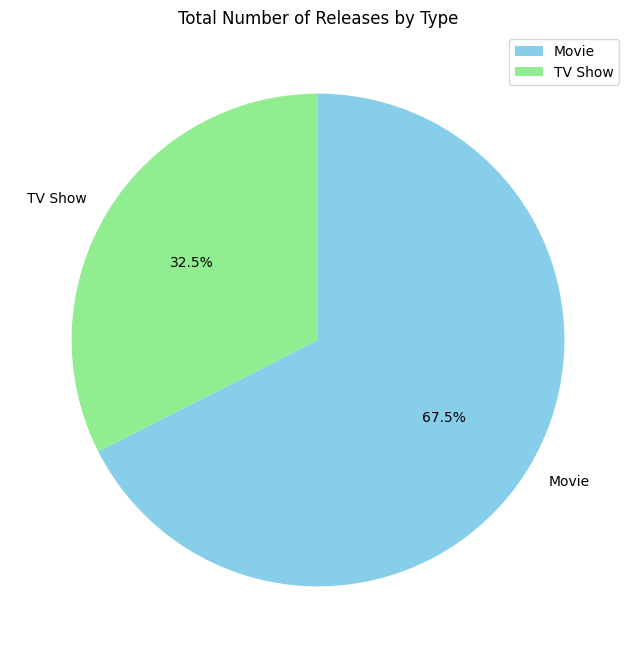

In [4]:
sns.countplot(x='type', data=dataset)
plt.title('Number of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

country_counts = dataset['country'].value_counts()
filtered_countries = country_counts[country_counts >= 5].index.tolist()
subset_dataset = dataset[dataset['country'].str.split(',').str.len() == 1]
country_col = subset_dataset[subset_dataset['country'].isin(filtered_countries)]

type_counts = subset_dataset['type'].value_counts()

plt.figure(figsize=(8, 8))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=['skyblue', 'lightgreen'])
plt.title('Total Number of Releases by Type')
plt.ylabel('')  # Remove the default ylabel which is the column name
plt.legend(type_counts.index, loc='upper right')
plt.show()

As we see here, Netflix prioritizes hosting Movies over TV Shows, with Movies accounting for nearly 70% of releases on the platform but with a library of almost 3000 TV shows the average consumer still has an overwhelming amount of shows to pick from.

Now let's break down the number of releases for each country.

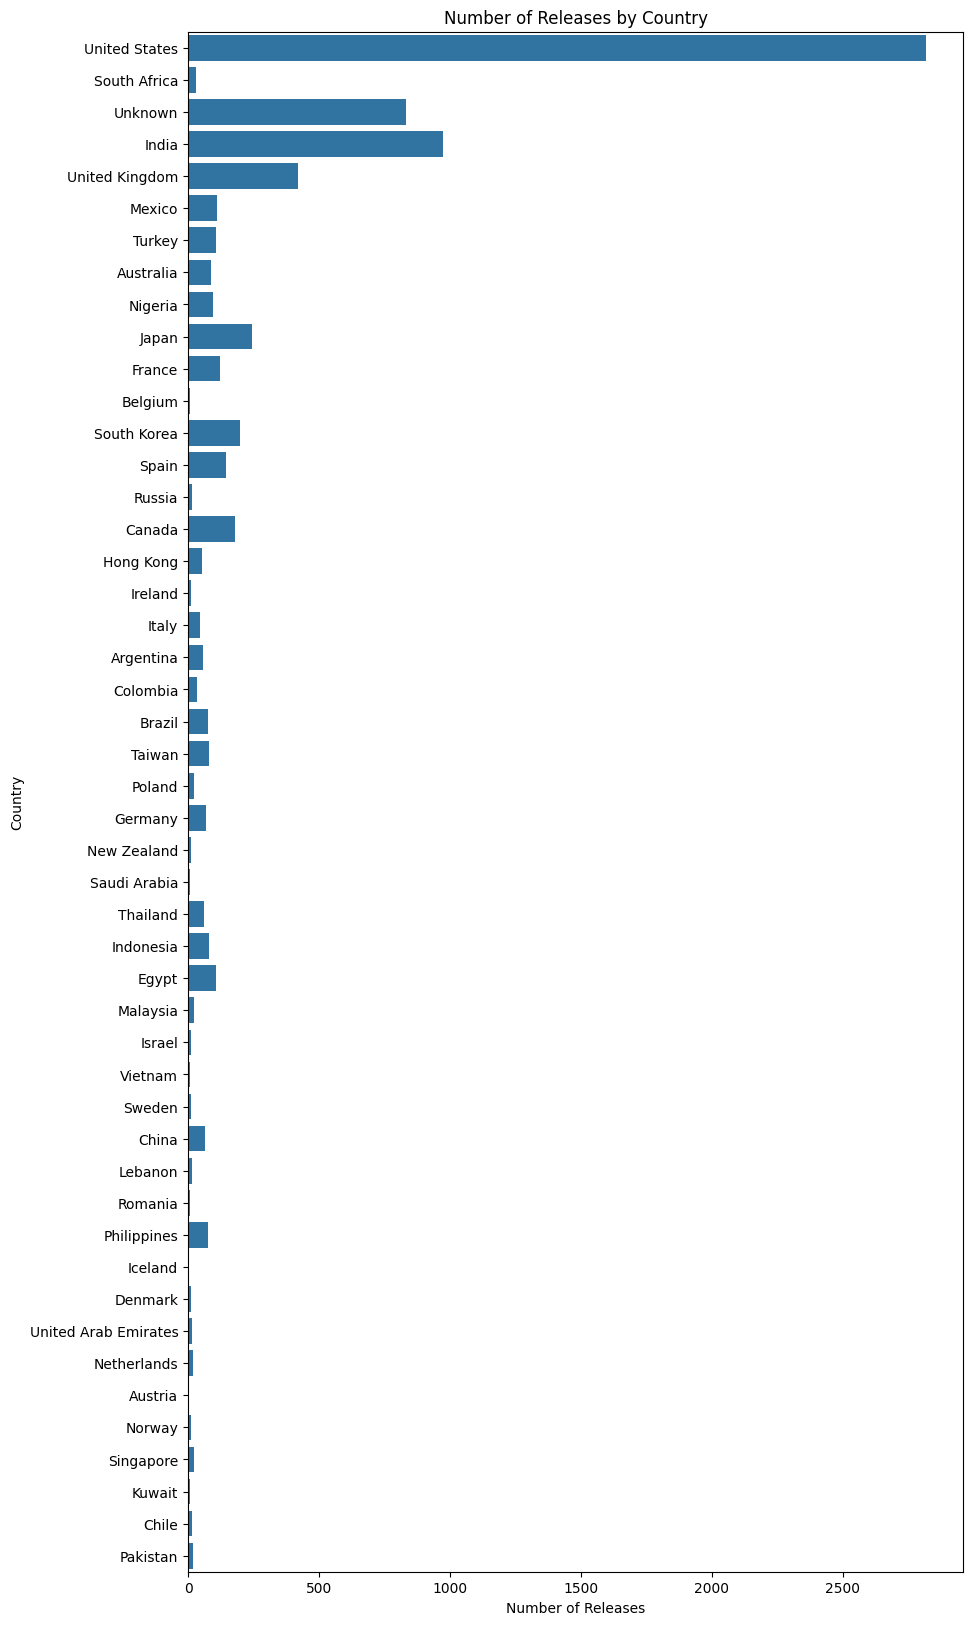

Top 5 Countries by Number of Releases:
country
United States     2819
India              972
Unknown            831
United Kingdom     419
Japan              245
Name: count, dtype: int64


In [5]:
plt.figure(figsize=(10, 20))
sns.countplot(y='country',
              data=country_col)
plt.title('Number of Releases by Country')
plt.xlabel('Number of Releases')
plt.ylabel('Country')
plt.show()

# Get value counts of releases in the top 5 countries
top_countries_counts = subset_dataset['country'].value_counts().head(5)

print("Top 5 Countries by Number of Releases:")
print(top_countries_counts)

Unsurprisingly, the United States far surpasses the rest of the world in media production at over 2800 releases on Netflix alone, compared to the next highest country on the list India, which sits at just under 1000 releases.

Now let's analyze the popularity and production of Movies vs TV shows over time

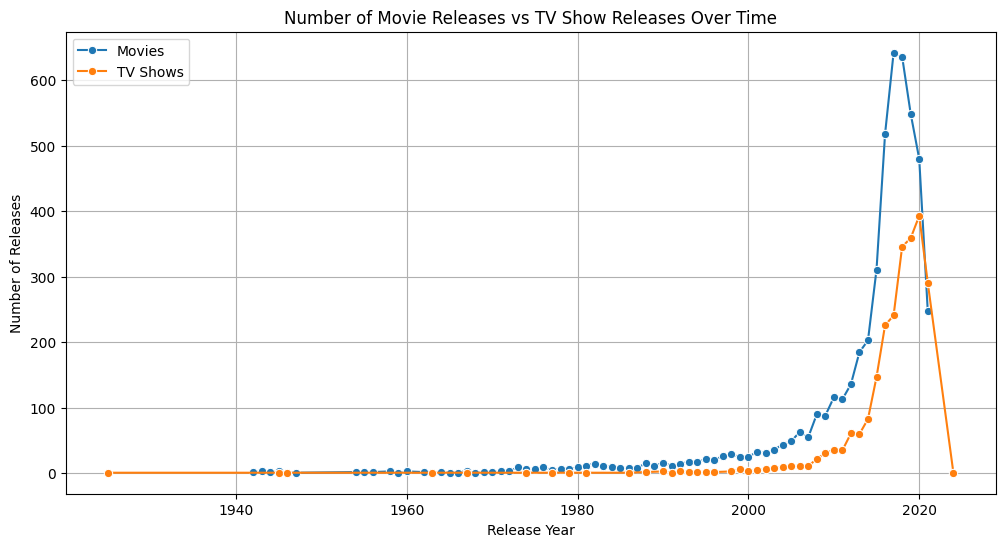

In [6]:
movie_data = subset_dataset[subset_dataset['type'] == 'Movie']
tv_show_data = subset_dataset[subset_dataset['type'] == 'TV Show']

movie_counts = movie_data.groupby('release_year').size()
tv_show_counts = tv_show_data.groupby('release_year').size()

plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_counts, label='Movies', marker='o')
sns.lineplot(data=tv_show_counts, label='TV Shows', marker='o')
plt.title('Number of Movie Releases vs TV Show Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

Judging by the lineplot, we see that we see that Movies have always been more popular than TV shows on Netflix.

This lineplot also tells us that Movie and TV Show production increased over time worldwide. While initially there wasnt much growth, after 1980 we see a slight increase in Movie production over TV show production, reaching exponential growth after 2000, then a huge crash in production following the COVID-19 Pandemic.

Its also interesting to note that after 2014, Movie production wildly outpaced TV show production with the most amount of movies being added to Netflix in 2017 and 2018, at roughly 650 releases in both of those years. Compared to TV shows that only had roughly 250 releases in 2017 and 350 releases in 2018.

# **Genre Analysis:**

*   ## What are the most popular genres on Netflix?
*   ## How has genre popularity evolved over the years?
*   ## Are there any correlations between the country of production and the genres produced?

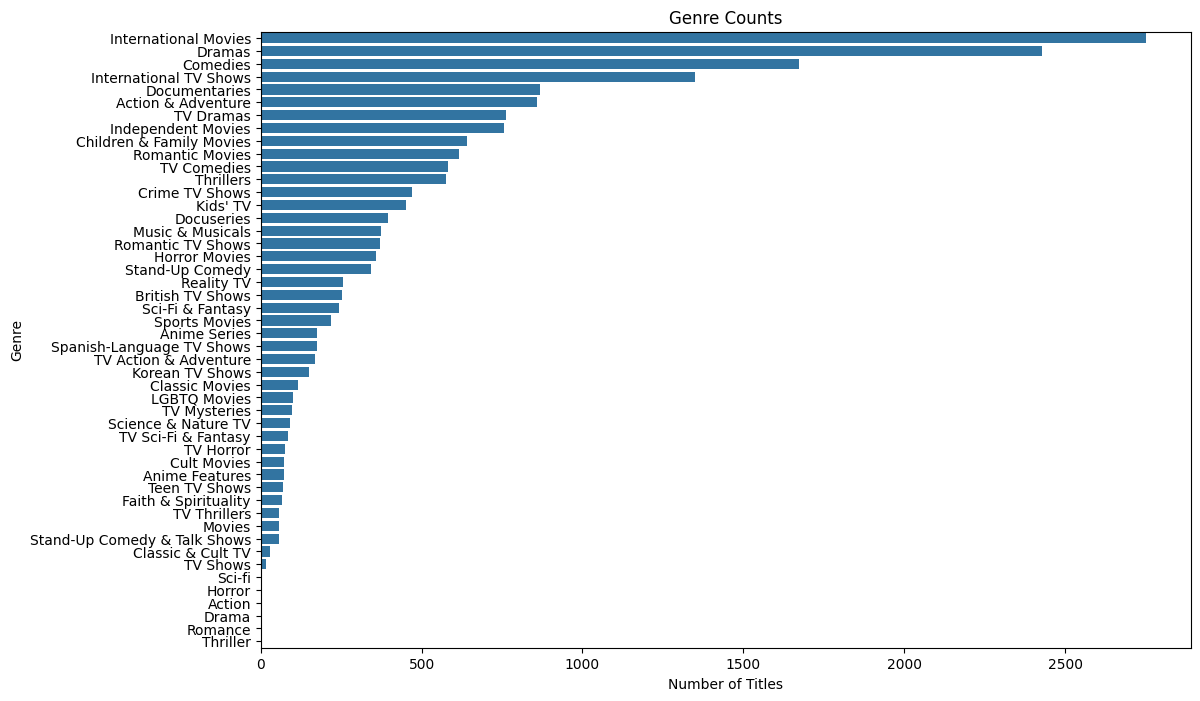

Top 5 Genres:
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


In [7]:
# Compare Genre counts
# Get all unique genres
all_genres = []

for genres in dataset['listed_in'].str.split(', '):
    if isinstance(genres, list):
        all_genres.extend(genres)

all_genres_series = pd.Series(all_genres)

plt.figure(figsize=(12, 8))
sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index)
plt.title('Genre Counts')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

top_genres_counts = all_genres_series.value_counts().head(5)

print("Top 5 Genres:")
print(top_genres_counts)

This gives us a good idea of what genres are most popular on Netflix, but there are some duplicate categories that are very similar to each other, lets see what happens when we combine some of these genres....

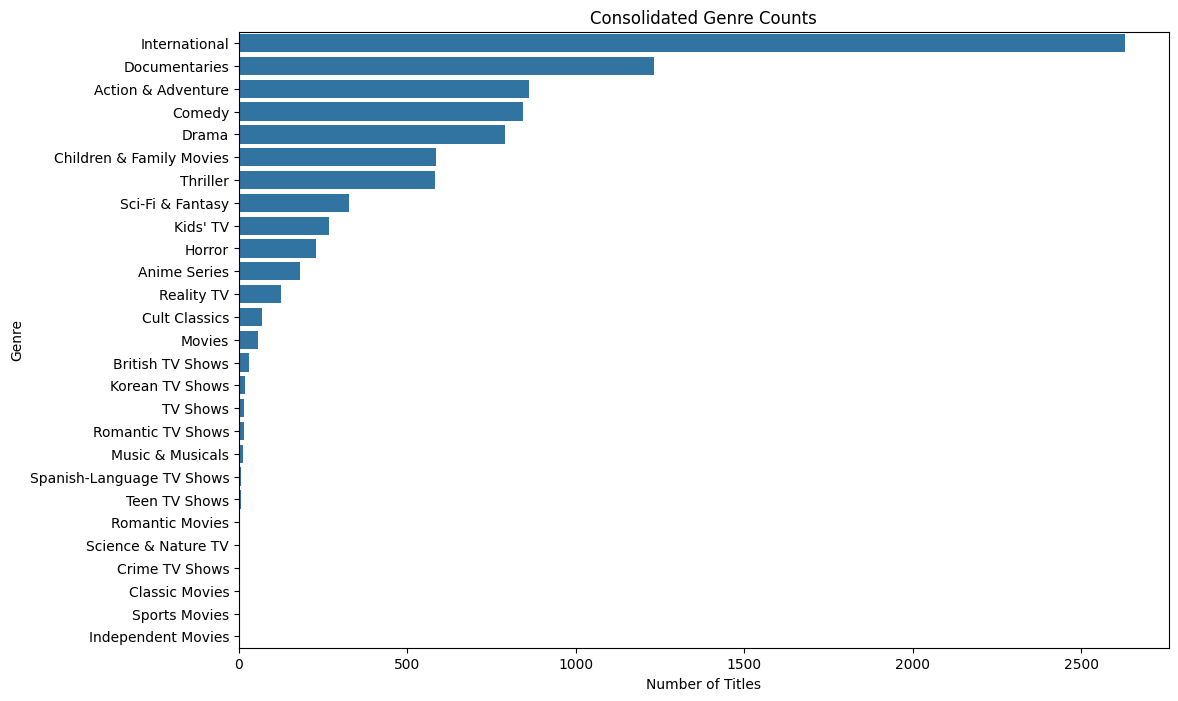

Top 5 Genres (Consolidated):
International         2629
Documentaries         1233
Action & Adventure     861
Comedy                 843
Drama                  789
Name: count, dtype: int64


In [8]:
consolidated_dataset = dataset.copy()

# Consolidate categories
comedy_mask = consolidated_dataset['listed_in'].str.contains('Comedy|TV Comedies|Comedies|Stand-Up Comedy', regex=True)
drama_mask = consolidated_dataset['listed_in'].str.contains('Drama|TV Dramas|Dramas', regex=True)
international_mask = consolidated_dataset['listed_in'].str.contains('International TV Shows|International Movies|International', regex=True)
documentaries_mask = consolidated_dataset['listed_in'].str.contains('Documentaries|Docuseries', regex=True)
children_family_mask = consolidated_dataset['listed_in'].str.contains('Children & Family Movies', regex=True)
anime_mask = consolidated_dataset['listed_in'].str.contains('Anime Series|Anime Features', regex=True)
horror_mask = consolidated_dataset['listed_in'].str.contains('Horror Movies|Horror|TV Horror', regex=True)
thriller_mask = consolidated_dataset['listed_in'].str.contains('Thrillers|TV Thrillers', regex=True)
cult_mask = consolidated_dataset['listed_in'].str.contains('Cult Movies|Classic & Cult TV', regex=True)
action_adventure_mask = consolidated_dataset['listed_in'].str.contains('Action & Adventure|TV Action & Adventure', regex=True)
sci_fi_mask = consolidated_dataset['listed_in'].str.contains('Sci-Fi & Fantasy|TV Sci-Fi & Fantasy', regex=True)

# Replace values based on masks
consolidated_dataset.loc[comedy_mask, 'listed_in'] = 'Comedy'
consolidated_dataset.loc[drama_mask, 'listed_in'] = 'Drama'
consolidated_dataset.loc[international_mask, 'listed_in'] = 'International'
consolidated_dataset.loc[documentaries_mask, 'listed_in'] = 'Documentaries'
consolidated_dataset.loc[children_family_mask, 'listed_in'] = 'Children & Family Movies'
consolidated_dataset.loc[anime_mask, 'listed_in'] = 'Anime Series'
consolidated_dataset.loc[horror_mask, 'listed_in'] = 'Horror'
consolidated_dataset.loc[thriller_mask, 'listed_in'] = 'Thriller'
consolidated_dataset.loc[cult_mask, 'listed_in'] = 'Cult Classics'
consolidated_dataset.loc[action_adventure_mask, 'listed_in'] = 'Action & Adventure'
consolidated_dataset.loc[sci_fi_mask, 'listed_in'] = 'Sci-Fi & Fantasy'

# Get all unique consolidated genres
all_genres = []

for genres in consolidated_dataset['listed_in'].str.split(', '):
    if isinstance(genres, list):
        all_genres.extend(genres)

plt.figure(figsize=(12, 8))
sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index)
plt.title('Consolidated Genre Counts')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

top_genres_counts = pd.Series(all_genres).value_counts().head(5)

print("Top 5 Genres (Consolidated):")
print(top_genres_counts)

Comparing to the plot and breakdown from above, we see that International is still the top genre overall on Netflix.

This seems to contradict with our graph of *Releases by Country* that we plotted earlier, which showed the United States as the leader in number of releases on the platform. In almost all cases the United States is not considered an 'International' producer, yet the trend for Netflix as of late has been to acquire lots of foreign TV shows and films based on the recent popularity of shows like Squid Game (*South Korea*), Money Heist (*Spain*), and Lupin (*France*).

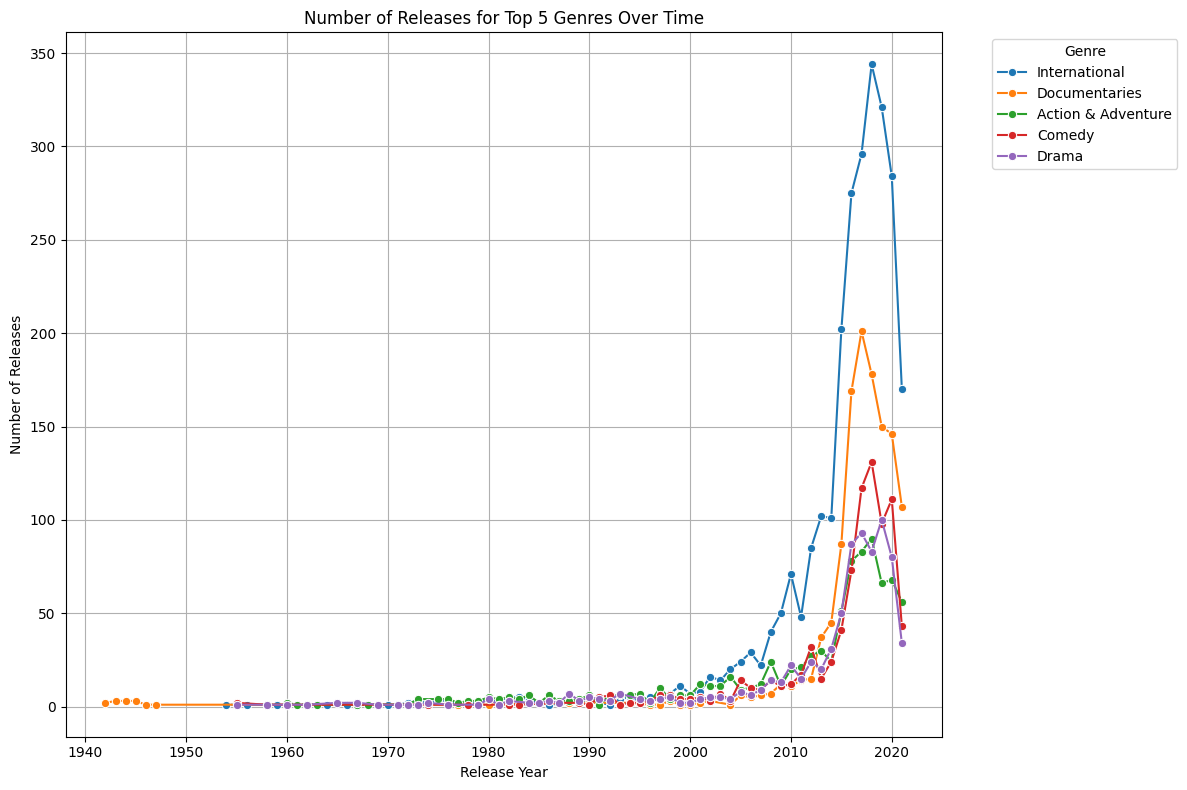

In [128]:
top_genres = consolidated_dataset['listed_in'].value_counts().head(5).index.tolist()

# Create subsets for each top genre
genre_data = {genre: consolidated_dataset[consolidated_dataset['listed_in'] == genre] for genre in top_genres}

plt.figure(figsize=(12, 8))

# Plot each genre separately
for genre, data in genre_data.items():
    sns.lineplot(x='release_year', y='Count', data=data.groupby('release_year').size().reset_index(name='Count'), label=genre, marker='o')

# Add plot details
plt.title('Number of Releases for Top 5 Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

This graph essentially follows trend from the previous graph which broke down the amount of releases on the platform each year. However, by separating the releases by genre we can see a couple interesting trends.

For example, we can see that there was little International content released before the year 2000. But after the year 2002, International film and TV started to become more popular becoming the dominant genre on the platform.

Documentaries, the second largest genre on Netflix, did not begin to gain traction until roughly 2013, where it would begin to rise far above the other genres.

Finally, we look at the relationship between Action & Adventure, Comedy, and Drama. For the most part, Action & Adventure has had a slight edge in number of releases over the years, but in 2014 the genre began to fade in popularity as Drama and Comedy became more popular. However, following the aftermath of the COVID-19 Pandemic, Action & Adventure regained aslight edge over the two. It's also interesting to note that Action & Adventure was also the genre least affected by COVID-19 (at least out of the top 5).

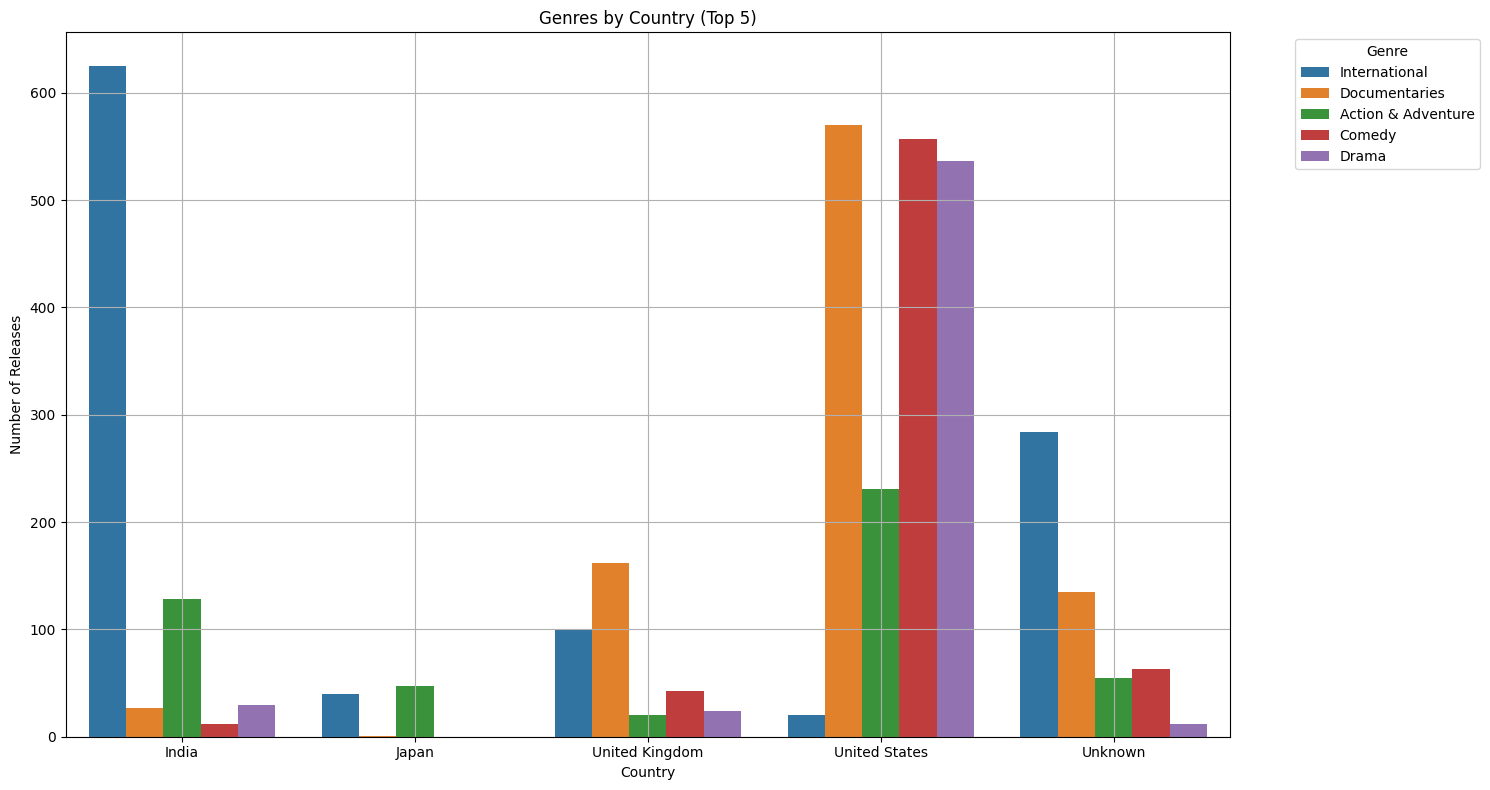

In [10]:
top_countries = consolidated_dataset['country'].value_counts().head(5).index.tolist()
top_genres = consolidated_dataset['listed_in'].value_counts().head(5).index.tolist()

filtered_dataset = consolidated_dataset[consolidated_dataset['country'].isin(top_countries)]

# Create a pivot table to count the number of releases for each genre by country
pivot_table = filtered_dataset.pivot_table(index='country', columns='listed_in', values='show_id', aggfunc='count', fill_value=0)
pivot_table = pivot_table[top_genres]
# Reshape the pivot table to a long format for plotting
pivot_table = pivot_table.reset_index().melt(id_vars='country', var_name='genre', value_name='count')

plt.figure(figsize=(15, 8))
sns.barplot(x='country', y='count', hue='genre', data=pivot_table)
plt.title('Genres by Country (Top 5)')
plt.xlabel('Country')
plt.ylabel('Number of Releases')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Now, analyzing each countries effect on releases by genre we see that the United States and India again dominate the global film industry, however in different categories.

Netflix is an American company, so it makes sense why so many releases from India end up in the International category. The sheer number of releases from India can be attributed to '*Bollywood* ' India's own film industry based out of Mumbai.

While India dominates in the International genre, America is the largest producer of the other four genres by a wide margin.

# **Rating Analysis:**

* ## What are the most common age ratings for Netflix content?
* ## Is there a relationship between content type (movie/TV show) and age rating?

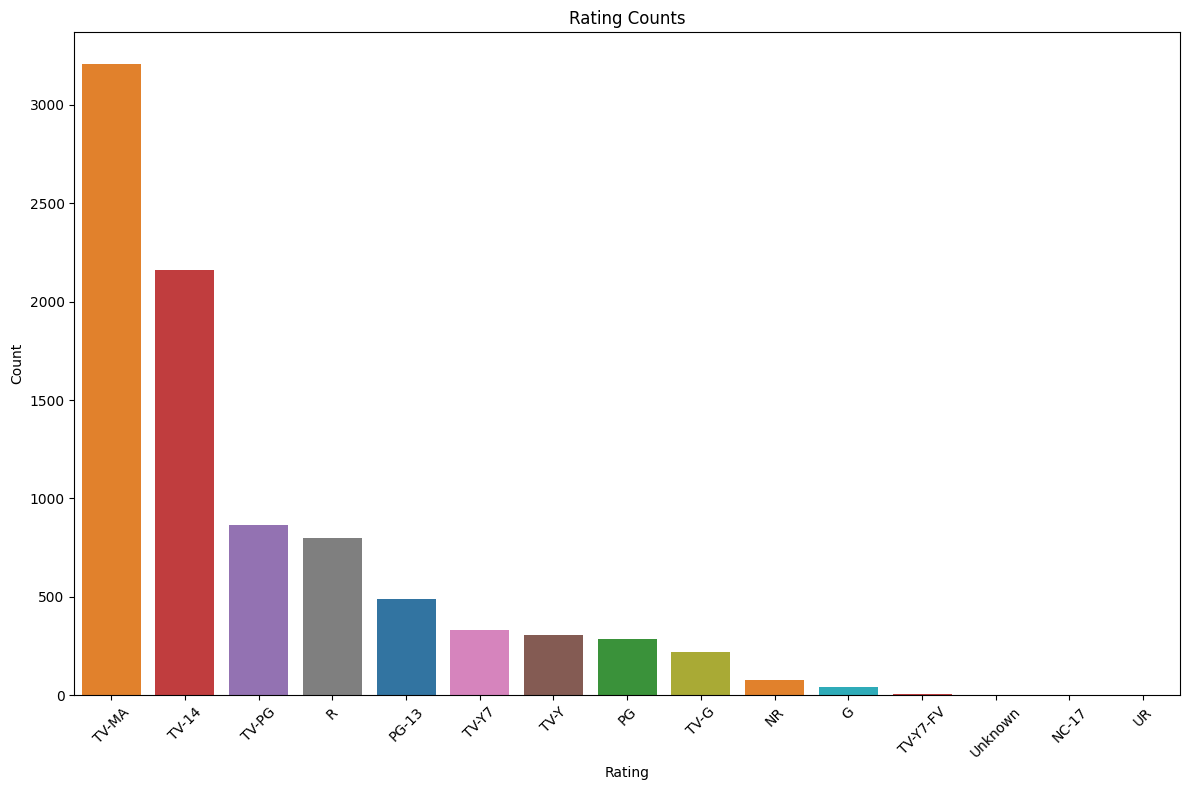

In [129]:
# Compare Rating counts
# Get all unique ratings
all_ratings = []

for rating in dataset['rating'].str.split(', '):
    if isinstance(rating, list):
        all_ratings.extend(rating)

all_ratings_series = pd.Series(all_ratings)

# Remove unwanted ratings
unwanted_ratings = ['74 min', '84 min', '66 min', 'A']
filtered_ratings_series = all_ratings_series[~all_ratings_series.isin(unwanted_ratings)]

rating_counts = filtered_ratings_series.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(x=filtered_ratings_series,
              order=rating_counts.index,
              hue=filtered_ratings_series,
              palette='tab10')
plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see here that the most common rating for Netflix content is TV-MA, indicating that the largest portion of content on Netflix is catered towards adult audiences.

It's important to note that Netflix adopts their own rating system independent of the MPAA (Motion Picture Assosciation of America) and the U.S. TV rating system used for movies and TV shows on broadcast. However, Netflix's system closely mirrors the US TV system, but some titles (most likely from before the mid-90's before the US TV rating system was established) are still attributed to the outdated MPAA standards, we can assume these titles were released long ago and Netflix decided to keep it's original rating on release.

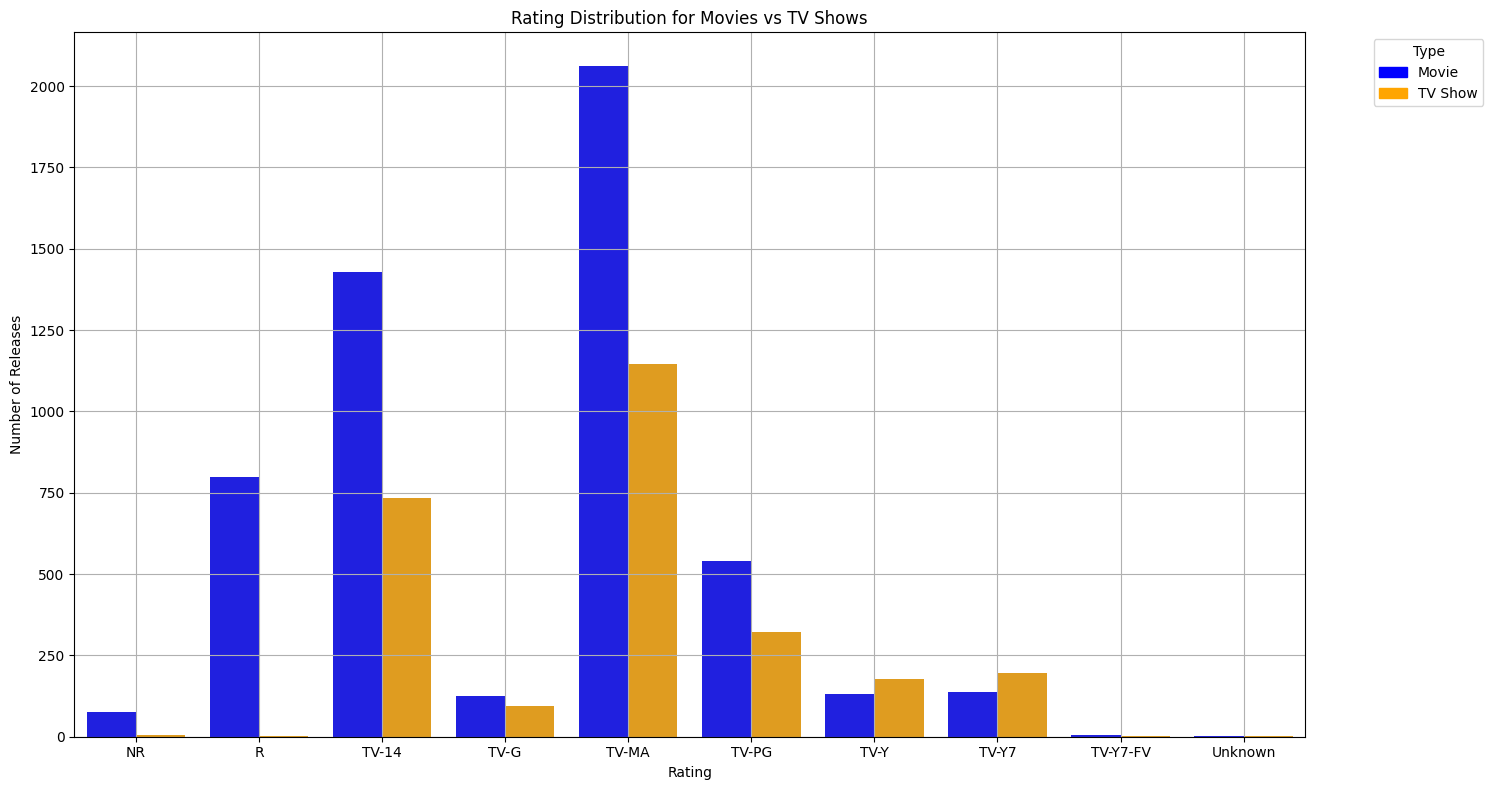

In [12]:
movie_data = dataset[dataset['type'] == 'Movie']
tv_show_data = dataset[dataset['type'] == 'TV Show']

movie_pivot = movie_data.pivot_table(index='rating', values='show_id', aggfunc='count', fill_value=0).reset_index()
tv_show_pivot = tv_show_data.pivot_table(index='rating', values='show_id', aggfunc='count', fill_value=0).reset_index()

# Merge the two pivot tables on 'rating' to have a combined dataset
combined_pivot = pd.merge(movie_pivot, tv_show_pivot, on='rating', suffixes=('_movie', '_tv'))

# Melt the combined pivot table to long format for plotting
combined_pivot_long = combined_pivot.melt(id_vars='rating',
                                          value_vars=['show_id_movie', 'show_id_tv'],
                                          var_name='type',
                                          value_name='count')

# Set a custom color palette
custom_palette = {'Movie': 'blue', 'TV Show': 'orange'}
sns.set_palette(custom_palette.values())

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='rating', y='count', hue='type', data=combined_pivot_long)
plt.title('Rating Distribution for Movies vs TV Shows')
plt.xlabel('Rating')
plt.ylabel('Number of Releases')

# Get current axes
ax = plt.gca()

# Create custom legend labels with colors
legend_labels = ['Movie', 'TV Show']
legend_colors = [custom_palette[label] for label in legend_labels]
legend_patches = [matplotlib.patches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add custom legend
plt.legend(handles=legend_patches, title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Now to examine the rating distribution between Movies and TV Shows. By plotting TV Shows and Movies next to each other, we can understand the distribution a little better, since there is significantly more Movies than TV Shows on Netflix.

Again we see TV-MA content is still the largest category on Netflix for both movies and TV shows with TV-14 content still retaining the 2nd place slot.

# **Duration Analysis:**

*   ## What is the average number of seasons for TV shows?
*   ## Are there trends in content duration over time?


Average number of seasons:     1.76
Median number of seasons:      1.00
Standard deviation of seasons: 1.58

Maximum seasons:     17 (Grey's Anatomy)
Minimum seasons:     1


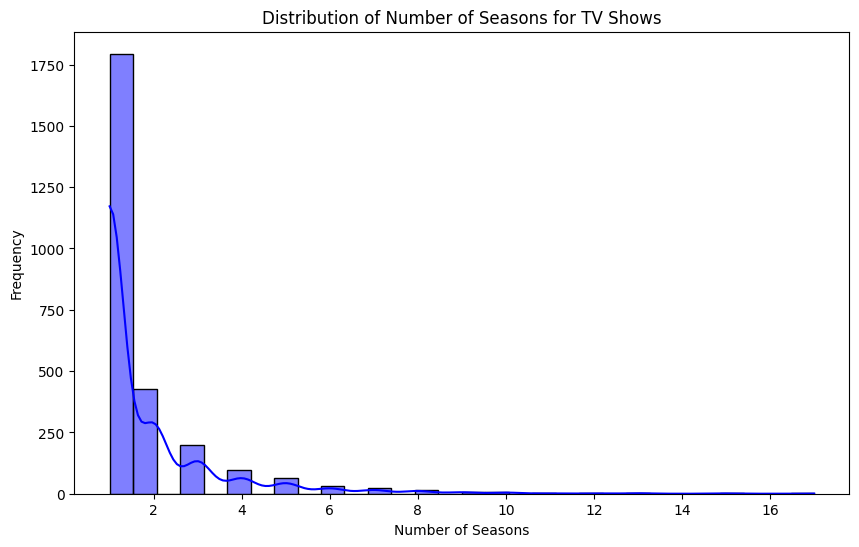

In [39]:
tv_shows = dataset[dataset['type'] == 'TV Show'].copy()
tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)

avg_seasons = tv_shows['num_seasons'].mean()
median_seasons = tv_shows['num_seasons'].median()
std_seasons = tv_shows['num_seasons'].std()

print(f"\nAverage number of seasons:     {avg_seasons:.2f}")
print(f"Median number of seasons:      {median_seasons:.2f}")
print(f"Standard deviation of seasons: {std_seasons:.2f}\n")

max_seasons = tv_shows['num_seasons'].max()
min_seasons = tv_shows['num_seasons'].min()

max_seasons_row = tv_shows.loc[tv_shows['num_seasons'].idxmax()]
show_max = max_seasons_row['title']

print(f"Maximum seasons:     {max_seasons} ({show_max})")
print(f"Minimum seasons:     {min_seasons}")

plt.figure(figsize=(10, 6))
sns.histplot(tv_shows['num_seasons'], bins=30, kde=True)
plt.title('Distribution of Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

We see here that most TV shows get cancelled after their first season, and if they're lucky to make it to their second or third season, the chances of the show being canceled increase drastically.

Average movie length:  99.53 minutes
Median movie length:   98.00  minutes
Stdev of movie length: 28.37 minutes

Maximum movie duration: 312 minutes (Black Mirror: Bandersnatch)
Minimum movie duration: 0 minutes (Louis C.K. 2017)


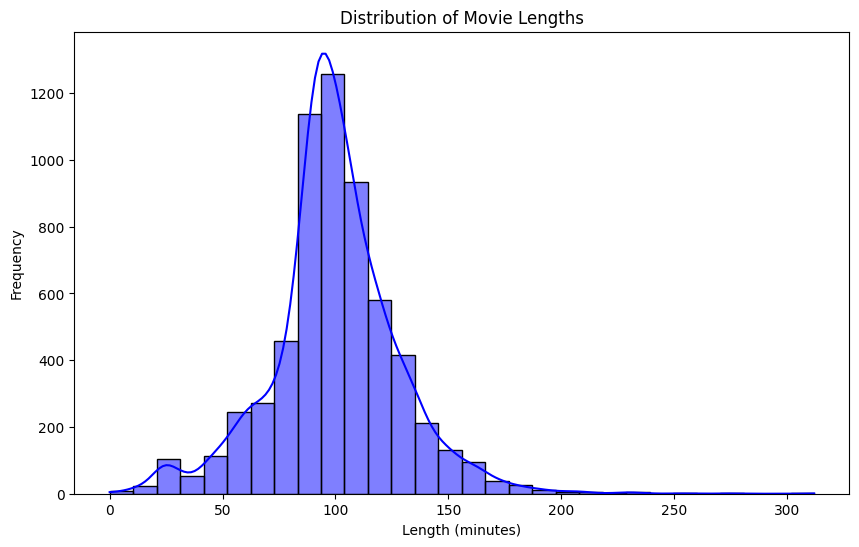

In [46]:
movies = dataset[dataset['type'] == 'Movie'].copy()

movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)  # Convert to float to handle NaN
movies['duration_min'] = movies['duration_min'].fillna(0)  # Fill NaN with 0
movies['duration_min'] = movies['duration_min'].astype(int)  # Convert to integer after filling NaN

avg_length = movies['duration_min'].mean()
median_length = movies['duration_min'].median()
std_length = movies['duration_min'].std()

print(f"Average movie length:  {avg_length:.2f} minutes")
print(f"Median movie length:   {median_length:.2f}  minutes")
print(f"Stdev of movie length: {std_length:.2f} minutes")

max_duration = movies['duration_min'].max()
min_duration = movies['duration_min'].min()

max_duration_row = movies.loc[movies['duration_min'].idxmax()]
movie_max = max_duration_row['title']
min_duration_row = movies.loc[movies['duration_min'].idxmin()]
movie_min = min_duration_row['title']

print(f"\nMaximum movie duration: {max_duration} minutes ({movie_max})")
print(f"Minimum movie duration: {min_duration} minutes ({movie_min})")

plt.figure(figsize=(10, 6))
sns.histplot(movies['duration_min'], bins=30, kde=True)
plt.title('Distribution of Movie Lengths')
plt.xlabel('Length (minutes)')
plt.ylabel('Frequency')
plt.show()

This graph tells us that most Movies on Netflix have a duration of roughly 100 minutes ± 28 mins

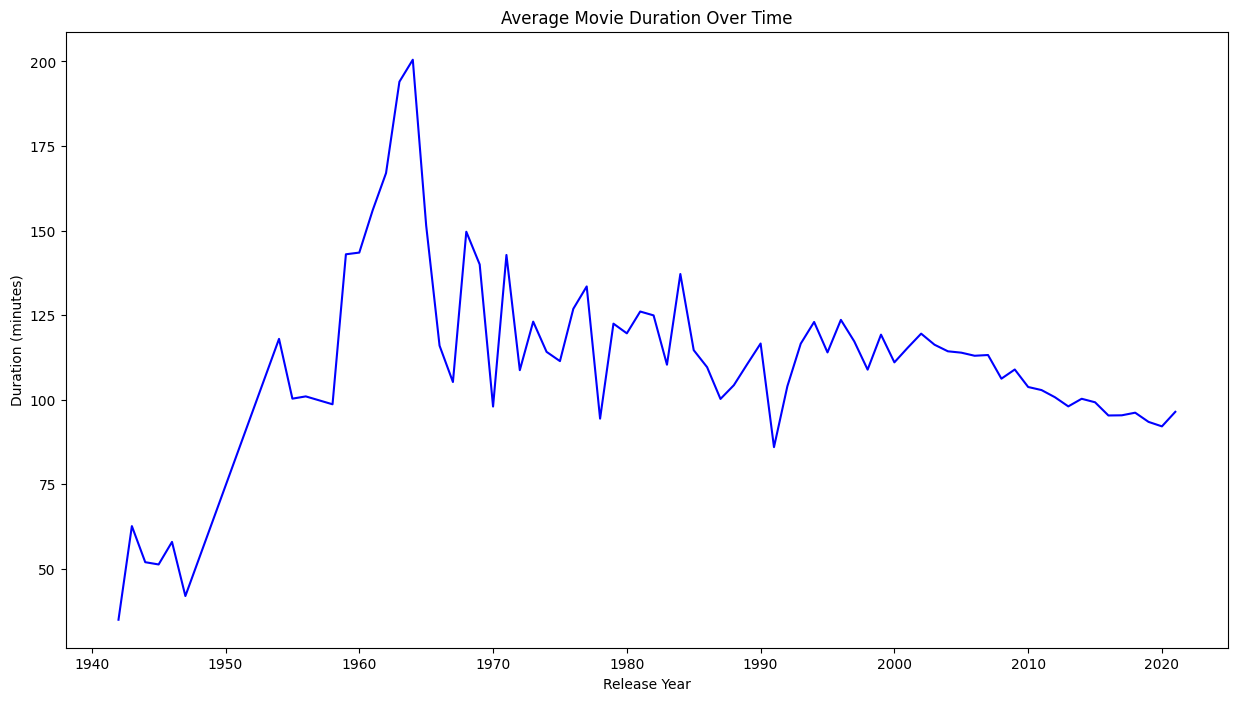

In [45]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='release_year',
             y='duration_min',
             data=movies.groupby('release_year')['duration_min'].mean().reset_index())

plt.title('Average Movie Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

Looking at the graph above we see that the mid 1960's had the longest movie times on average, with the majority of films reaching 200 minutes in length, that over 3 hours...

Lets look at all the releases from the 1957 to the 1967 to analyze the trend of movie durations released during that time

In [63]:
# Filter movies released between 1957 and 1967
filtered_movies = movies[(movies['release_year'] >= 1957) & (movies['release_year'] <= 1967)]
filtered_avg = filtered_movies['duration_min'].mean()

movies_1960_1970 = filtered_movies[['title', 'duration_min', 'release_year']]
movies_1960_1970_sorted = movies_1960_1970.sort_values(by='release_year')

movie_count = 0
for title in movies_1960_1970_sorted['title']:
  movie_count += 1

print(movies_1960_1970_sorted)
print(f"\nAverage movie length:  {filtered_avg:.2f} minutes")
print(f"Number of movies:      {movie_count}")

                                title  duration_min  release_year
6431            Cat on a Hot Tin Roof           108          1958
2368                    Cairo Station            73          1958
6853                             Gigi           115          1958
542                             Ujala           143          1959
7637                   Ocean's Eleven           127          1960
7133     Jis Desh Men Ganga Behti Hai           181          1960
5220                        Singapore           158          1960
6395                    Butterfield 8           108          1960
177              The Guns of Navarone           156          1961
5400                        Professor           163          1962
7332                           Lolita           153          1962
7530             Mutiny on the Bounty           185          1962
2373                          Saladin           194          1963
1126                     My Fair Lady           173          1964
7932      

Now lets compare with releases from 2010-2020 to understand the behaviors of modern audiences better

In [59]:
# Filter movies released between 2010 and 2020
filtered_movies = movies[(movies['release_year'] >= 2010) & (movies['release_year'] <= 2020)]
filtered_avg = filtered_movies['duration_min'].mean()

movies_2010_2020 = filtered_movies[['title', 'duration_min', 'release_year']]
movies_2010_2020_sorted = movies_2010_2020.sort_values(by='release_year')

print(movies_2010_2020_sorted)
print(f"\nAverage movie length:  {filtered_avg:.2f} minutes")

                                            title  duration_min  release_year
7240                                Kung Fu Magoo            79          2010
7854                                  Remember Me           112          2010
7857                     Resident Evil: Afterlife            97          2010
502                                 Tango With Me           104          2010
1675                                Break Ke Baad           108          2010
...                                           ...           ...           ...
2243                                   We Are One            86          2020
2242          Urzila Carlson: Overqualified Loser            62          2020
2837  Twin Murders: the Silence of the White City           110          2020
1398                                  Death of Me            94          2020
0                            Dick Johnson Is Dead            90          2020

[4702 rows x 3 columns]

Average movie length:  96.34 minutes


So not only was there over 200x more movies released between 2010-2020 than 1957-1967, but every movie on average released but the average duration of films dropped from 141.14 minutes to 96.34 minutes, a difference of roughly 50 minutes. This can most likely be attributed to modern audiences having shorter attention spans after having grown up with social media and the Internet.

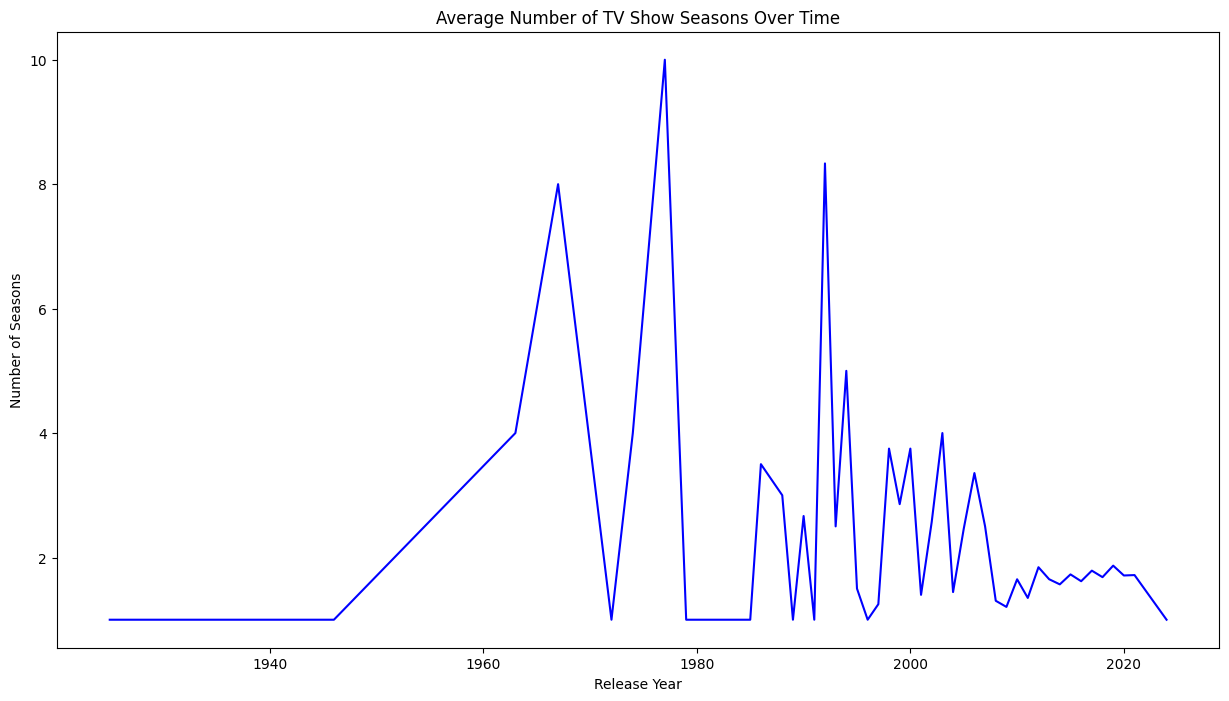

In [37]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='release_year',
             y='num_seasons',
             data=tv_shows.groupby('release_year')['num_seasons'].mean().reset_index())

plt.title('Average Number of TV Show Seasons Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Seasons')
plt.show()

We again see a trend of longer-form, or at least greater longevity from TV Shows released in the past, especially compared to today, where new shows are commonly canceled after a season or two. While there were still shows that got canned after a season in this period, it was not happening at the rate of modern shows, which get released more frequently and for smaller, niche audience groups that may not draw enough revenue to justify filming more.

In [67]:
# Filter TV shows from 1960-1980
filtered_TV = tv_shows[(tv_shows['release_year'] >= 1960) & (tv_shows['release_year'] <= 1980)]
filtered_avg = filtered_TV['num_seasons'].mean()

TV_1960_1980 = filtered_TV[['title', 'num_seasons', 'release_year']]
TV_1960_1980_sorted = TV_1960_1980.sort_values(by='release_year')

print(TV_1960_1980_sorted)
print(f"\nAverage number of seasons:  {filtered_avg:.2f}")

                                    title  num_seasons  release_year
8541  The Twilight Zone (Original Series)            4          1963
8189               The Andy Griffith Show            8          1967
4550     Monty Python's Fliegender Zirkus            1          1972
4551         Monty Python's Flying Circus            4          1974
6549                           Dad's Army           10          1977
6674                             El Chavo            1          1979

Average number of seasons:  4.67


In [65]:
# Filter TV shows from 2010-2020
filtered_TV = tv_shows[(tv_shows['release_year'] >= 2010) & (tv_shows['release_year'] <= 2020)]
filtered_avg = filtered_TV['num_seasons'].mean()

TV_2010_2020 = filtered_TV[['title', 'num_seasons', 'release_year']]
TV_2010_2020_sorted = TV_2010_2020.sort_values(by='release_year')

print(TV_2010_2020_sorted)
print(f"\nAverage number of seasons:  {filtered_avg:.2f}")

                       title  num_seasons  release_year
8373         The Jungle Book            1          2010
8371  The Jaime Maussan Show            1          2010
5393                Breakout            1          2010
3340              Maid-Sama!            1          2010
7872              Rishta.com            1          2010
...                      ...          ...           ...
2329            All For Love            1          2020
2331               Home Game            1          2020
2337               Twogether            1          2020
2255            Was It Love?            1          2020
17           Falsa identidad            2          2020

[2179 rows x 3 columns]

Average number of seasons:  1.72


We can see the discrepancy of the amount of releases even clearer in TV shows than movies. There was 363x more shows released between 2010-2020 than 1960-1980. Despite this extreme increase in the amount of shows being produced, their longevity did not live up to the classics. This is a great example of quantity vs. quality.

# **Director and Cast Analysis:**

*   ## Who are the most prolific directors on Netflix?
*   ## Which actors/actresses appear most frequently in Netflix content?
*   ## Is there a correlation between directors and the actors that star in their films?

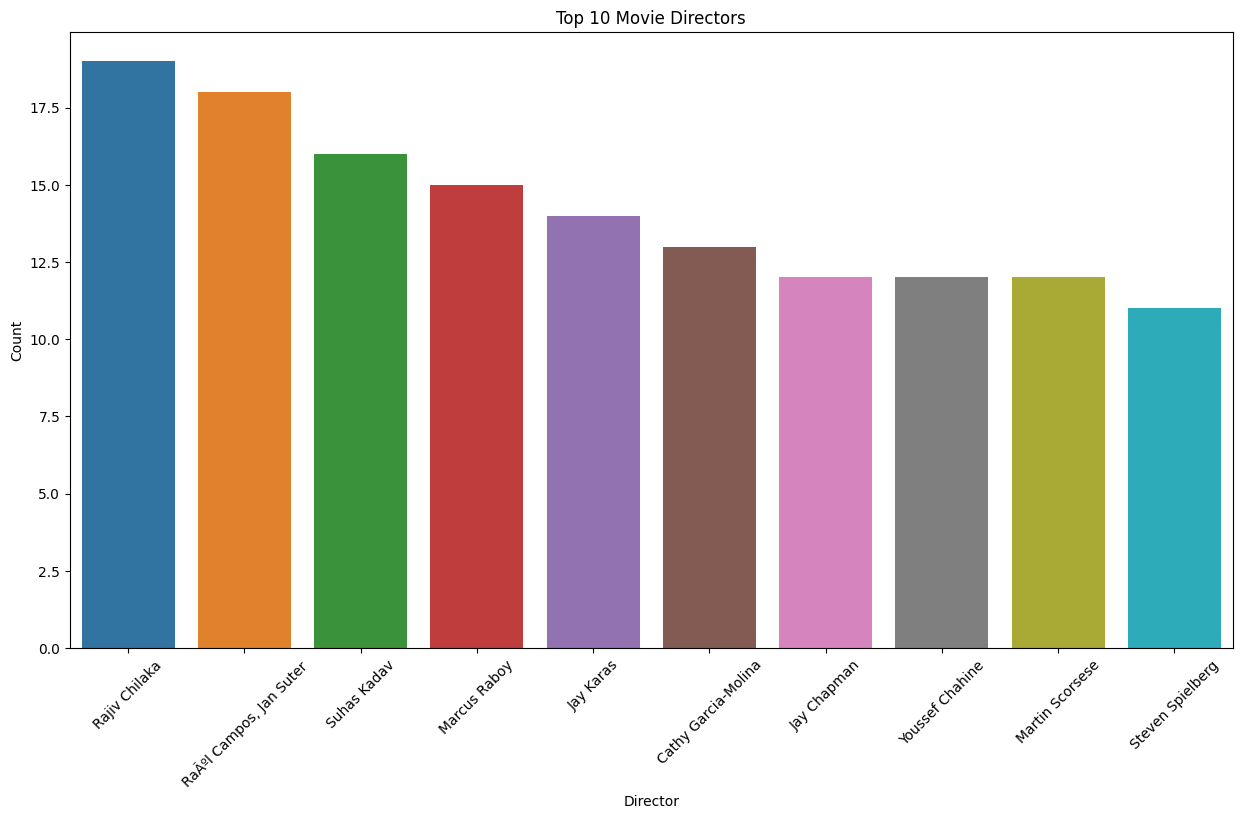

In [96]:
# Filter out 'Unknown' directors for movies
filtered_movie_directors = movies[movies['director'] != 'Unknown']['director'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=filtered_movie_directors.index[:10],
            y=filtered_movie_directors.values[:10],
            hue=filtered_movie_directors.index[:10],
            palette='tab10')
plt.title('Top 10 Movie Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

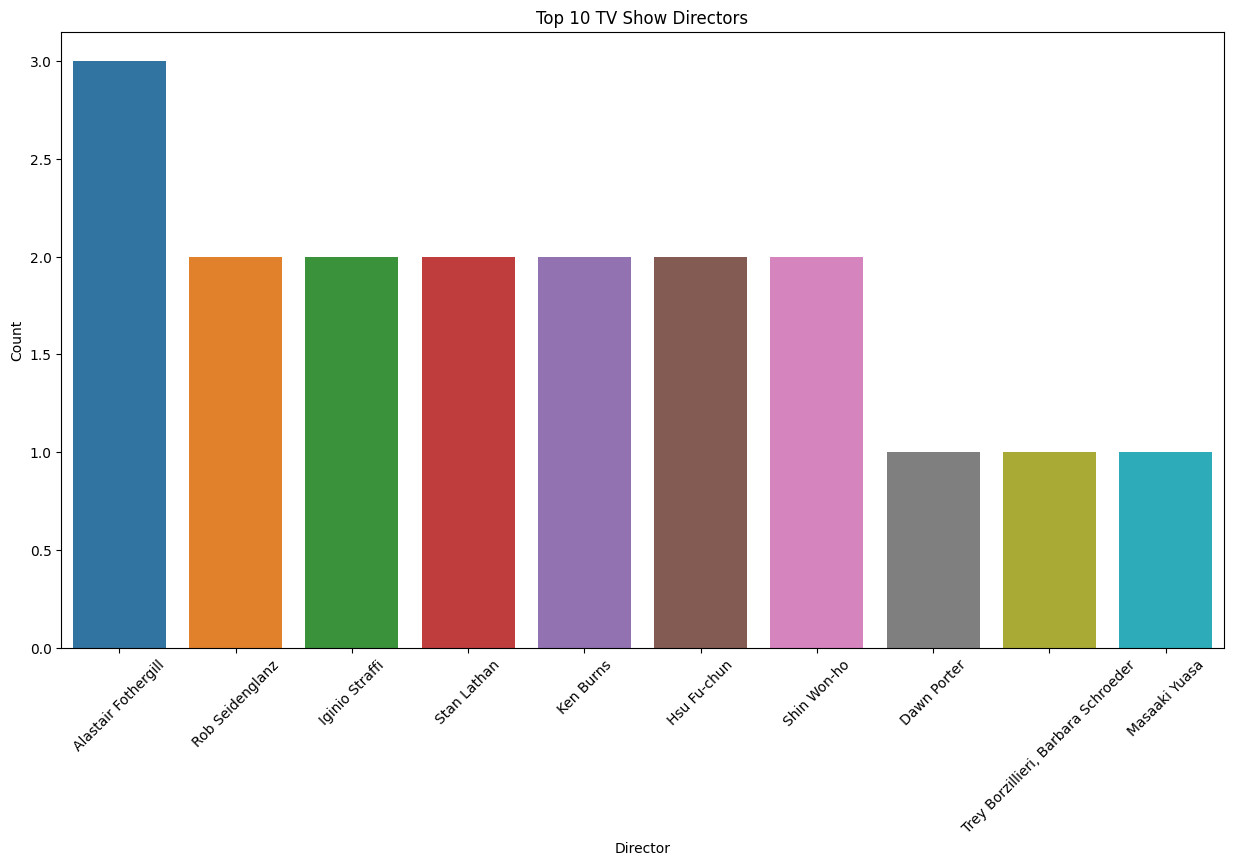

In [84]:
# Filter out 'Unknown' directors for TV shows
filtered_TV_directors = tv_shows[tv_shows['director'] != 'Unknown']['director'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=filtered_TV_directors.index[:10],
            y=filtered_TV_directors.values[:10],
            hue=filtered_TV_directors.index[:10],
            palette='tab10')
plt.title('Top 10 TV Show Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

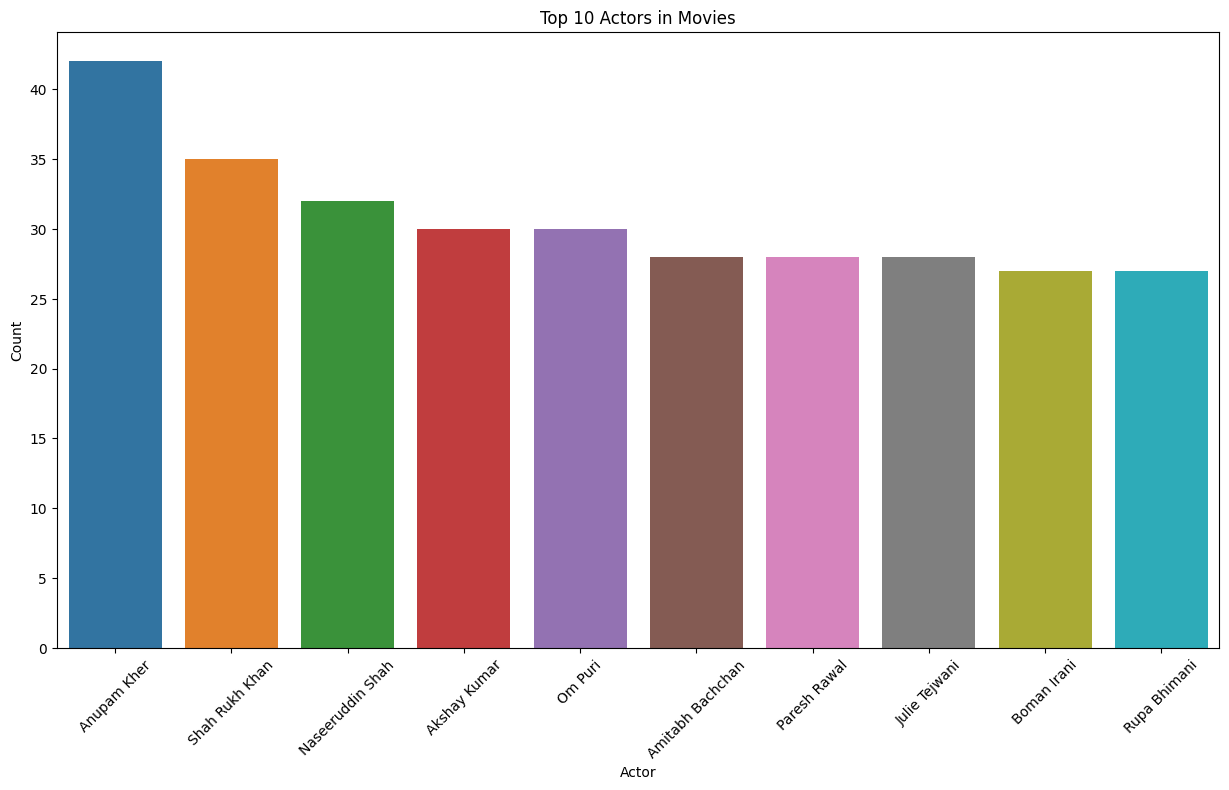

In [88]:
movie_actors_expanded = movies['cast'].str.split(', ').explode()

# Filter out 'Unknown' actors
filtered_movie_actors = movie_actors_expanded[movie_actors_expanded != 'Unknown']

top_actors = filtered_movie_actors.value_counts().head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_actors.index,
            y=top_actors.values,
            hue=top_actors.index,
            palette='tab10')
plt.title('Top 10 Actors in Movies')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

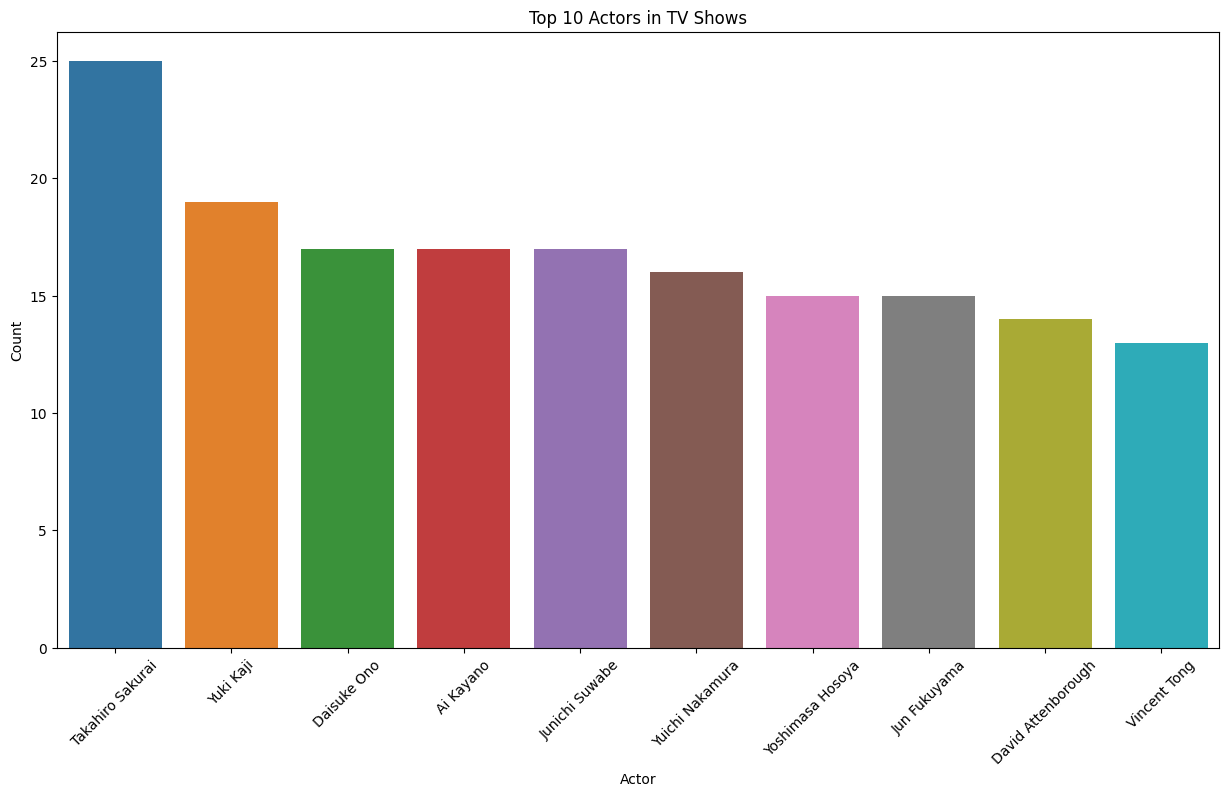

In [89]:
tv_actors_expanded = tv_shows['cast'].str.split(', ').explode()
filtered_TV_actors = tv_actors_expanded[tv_actors_expanded != 'Unknown']
top_actors = filtered_TV_actors.value_counts().head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_actors.index,
            y=top_actors.values,
            hue=top_actors.index,
            palette='tab10')
plt.title('Top 10 Actors in TV Shows')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

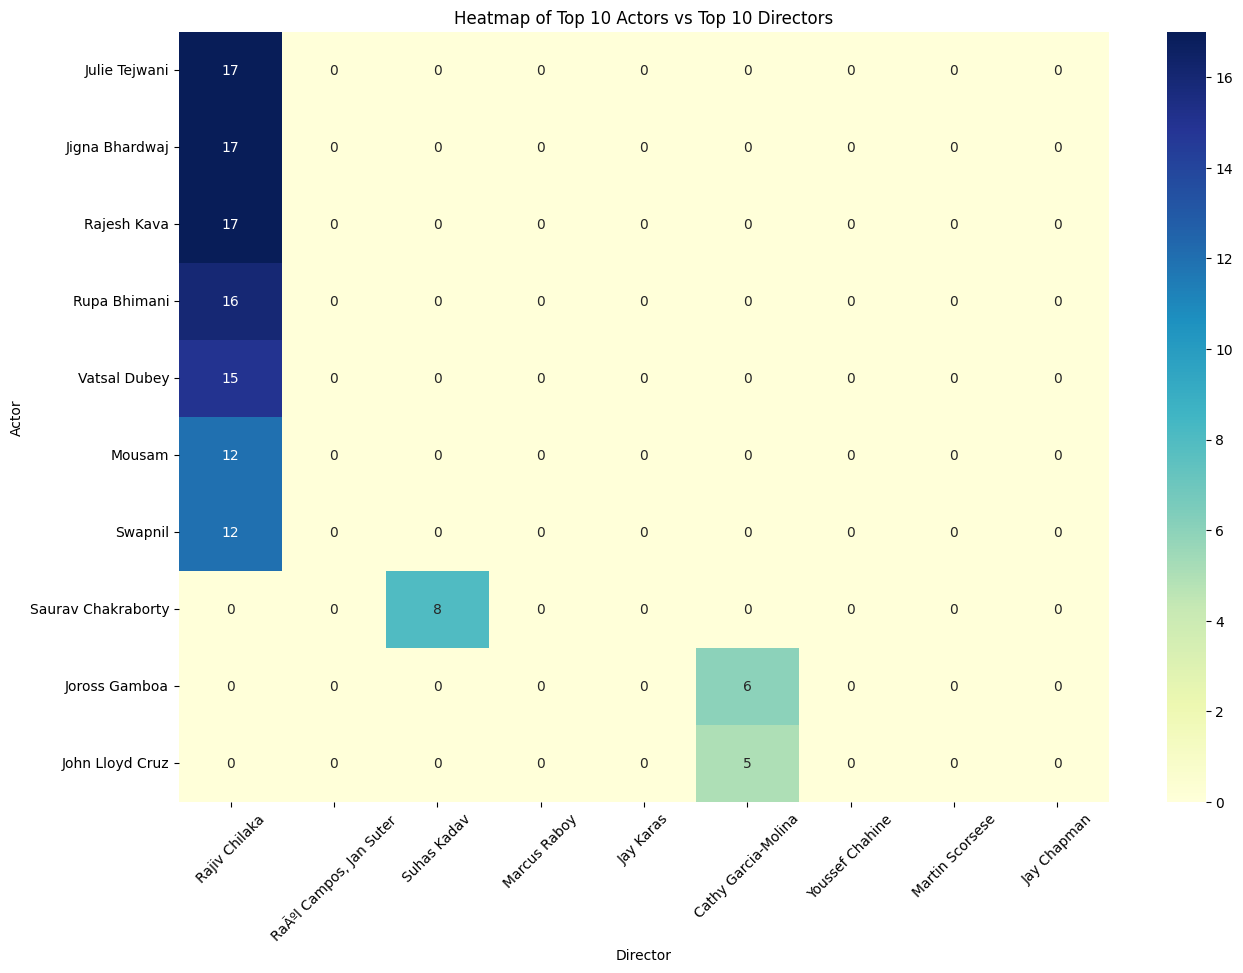

In [108]:
# Filter the movies dataset to include only the top 10 directors
filtered_movies = movies[movies['director'].isin(top_directors)].copy()

# Split and explode the 'cast' column
filtered_movies['cast_expanded'] = filtered_movies['cast'].str.split(', ')

# Filter out 'Unknown' actors
filtered_movies['cast_expanded'] = filtered_movies['cast_expanded'].apply(lambda x: [actor for actor in x if actor != 'Unknown'])

# Filter out 'Unknown' directors
filtered_movies = filtered_movies[filtered_movies['director'] != 'Unknown']

# Filter to only include movies with at least one known actor
filtered_movies = filtered_movies[filtered_movies['cast_expanded'].apply(len) > 0]

# Create a list of all unique actors from the filtered dataset
all_actors = filtered_movies['cast_expanded'].explode().unique()

# Get the top 10 actors
top_actors = filtered_movies['cast_expanded'].explode().value_counts().head(10).index.tolist()

# Filter out 'Unknown' from top_directors
top_directors = [director for director in top_directors if director != 'Unknown']

# Create a pivot table of top actors vs top directors
pivot_table = filtered_movies.explode('cast_expanded').pivot_table(index='cast_expanded', columns='director', values='title', aggfunc='count', fill_value=0)

# Filter the pivot table to include only the top 10 actors and directors
pivot_table = pivot_table.loc[top_actors, top_directors]

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Heatmap of Top 10 Actors vs Top 10 Directors')
plt.xlabel('Director')
plt.xticks(rotation=45)
plt.ylabel('Actor')
plt.show()

It appears that most directors dont typically reuse the same actors, however, Rajiv Chilaka defies that trend, releasing approximately 20 films, where 7 of the same actors have been recast 12-17 times!

# **Market and Geographic Analysis:**

*   ## Are there regional preferences in genre, rating, or content type?

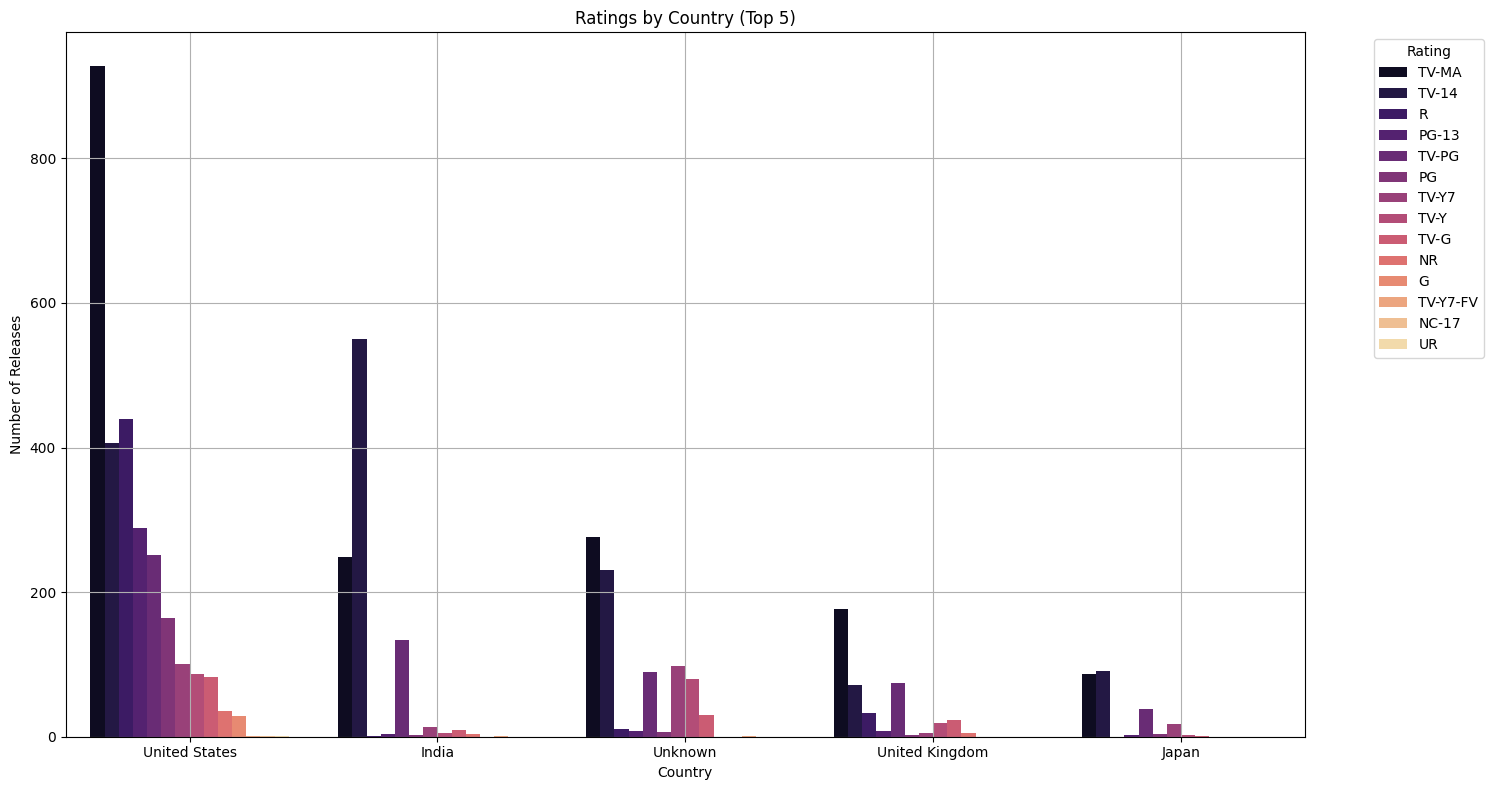

In [126]:
ratings_df = dataset.groupby(['country', 'rating']).size().reset_index(name='count')
ratings_df = ratings_df.sort_values(by='count', ascending=False)

# Filter out countries with less representation to focus on top ones
top_countries = ratings_df[ratings_df['country'] != 'Unknown Country'].groupby('country')['count'].sum().sort_values(ascending=False).head(5).index.tolist()
ratings_df = ratings_df[ratings_df['country'].isin(top_countries)]

# Define unwanted ratings
unwanted_ratings = ['74 min', '84 min', '66 min', 'A', 'Unknown']

# Filter out unwanted ratings
ratings_df = ratings_df[~ratings_df['rating'].isin(unwanted_ratings)]

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='country', y='count', hue='rating', data=ratings_df, palette='magma')
plt.title('Ratings by Country (Top 5)')
plt.xlabel('Country')
plt.ylabel('Number of Releases')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Content Description Analysis:**

*   ## Can natural language processing (NLP) techniques identify common themes or keywords in content descriptions?
*   ## Are there specific words or phrases that correlate with higher ratings or popularity?

# **Recommendation Systems:**

*   ## Build a simple recommendation system based on metadata such as genre, cast, director, and description, to suggest titles similar to a given movie or TV show?
*   ## How effective are genre-based recommendations compared to more complex content-based recommendations?